**Install Required Libraries**

In [ ]:
!pip install -q pandas sckit-learn

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


**Load and Preprocess the Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


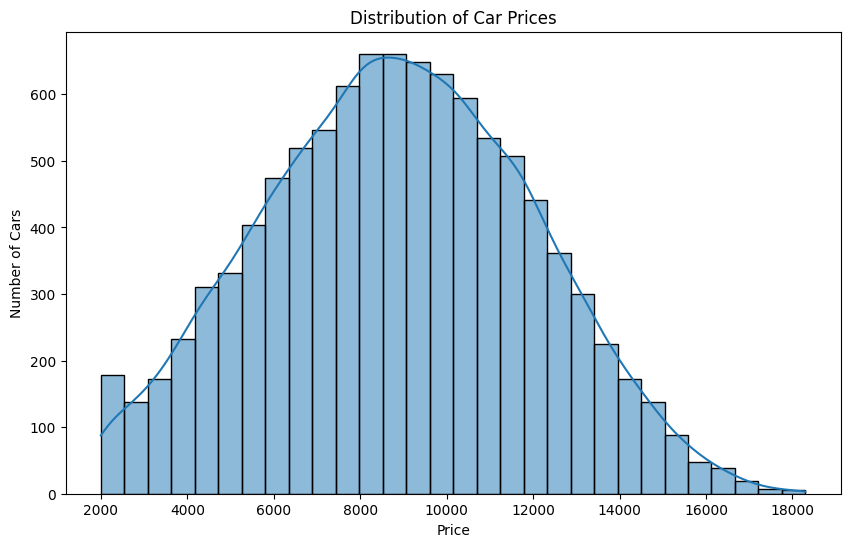

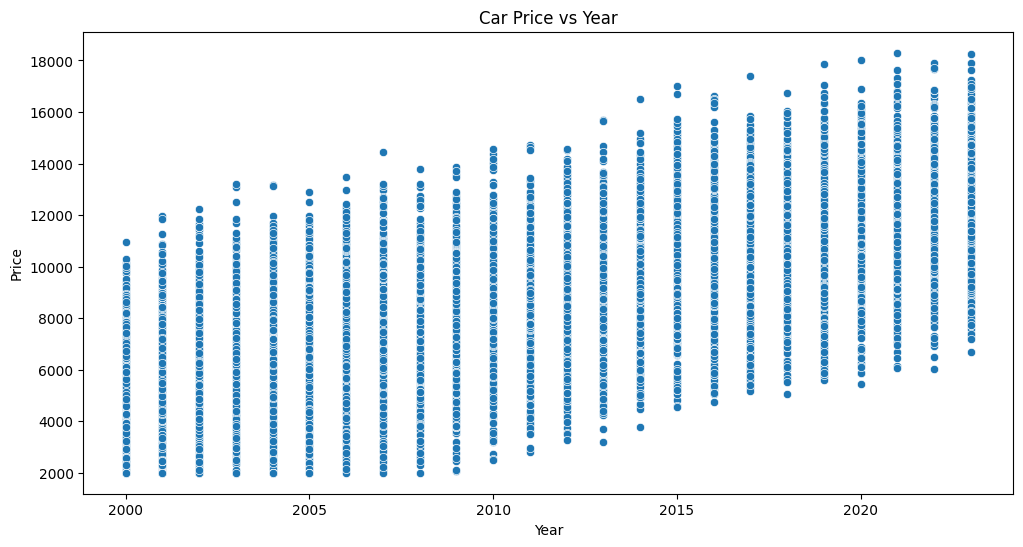

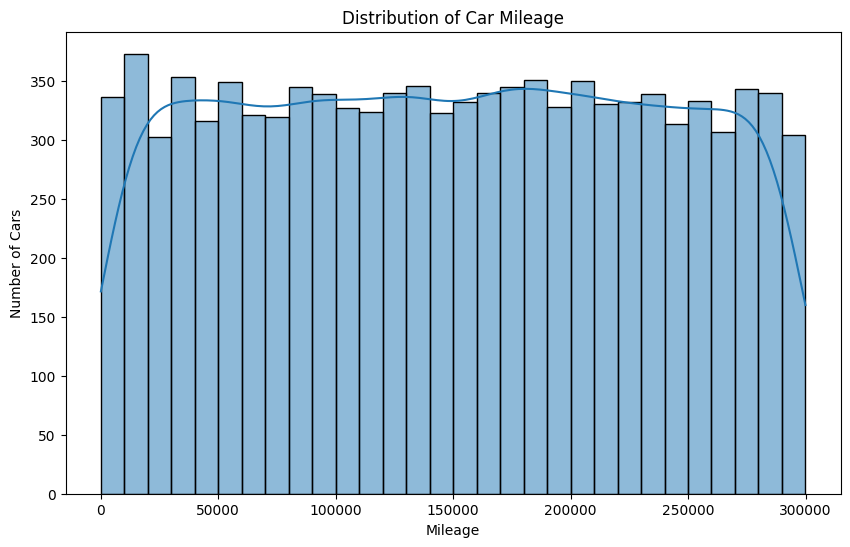

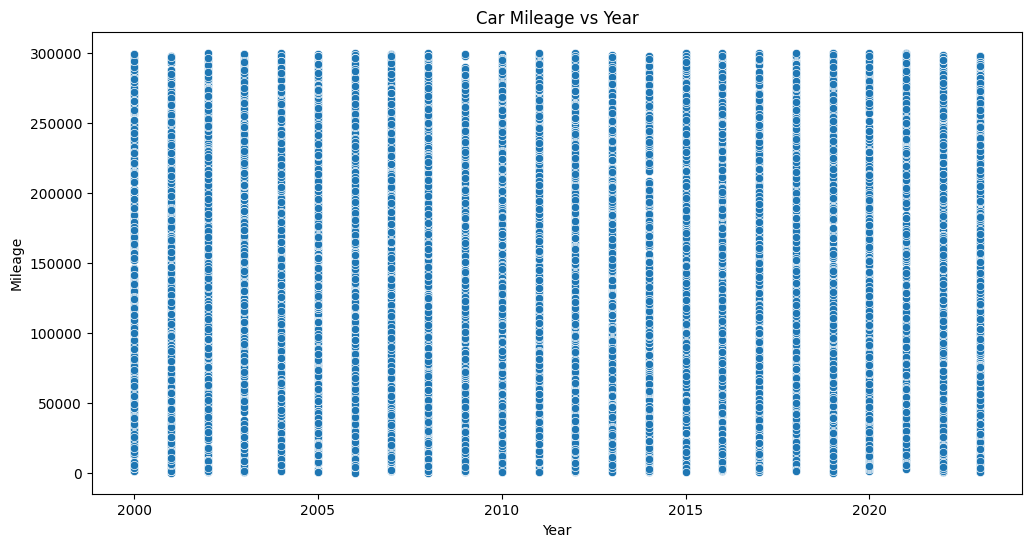

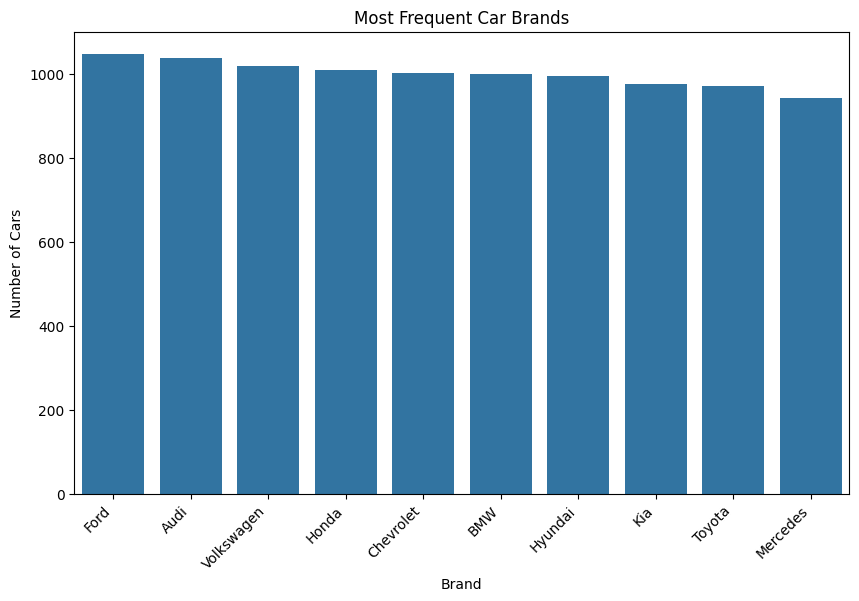

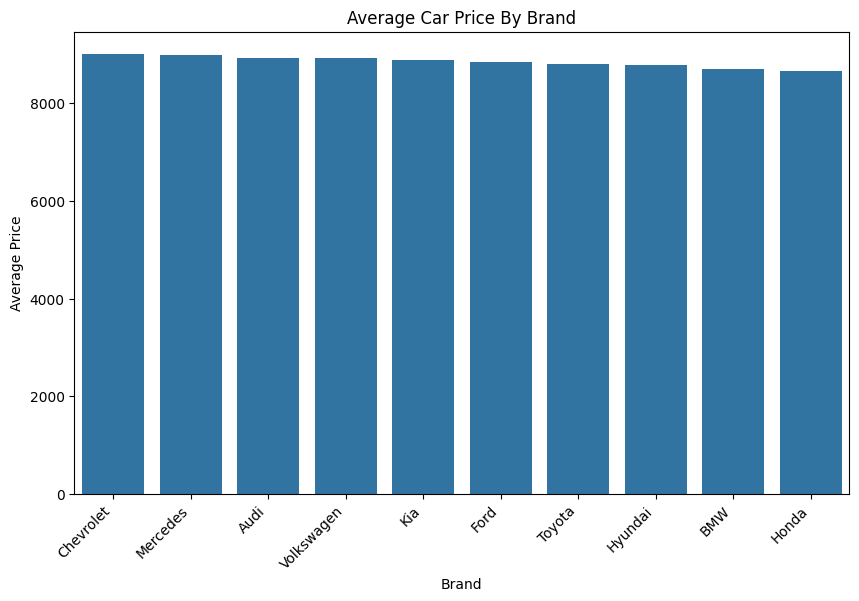

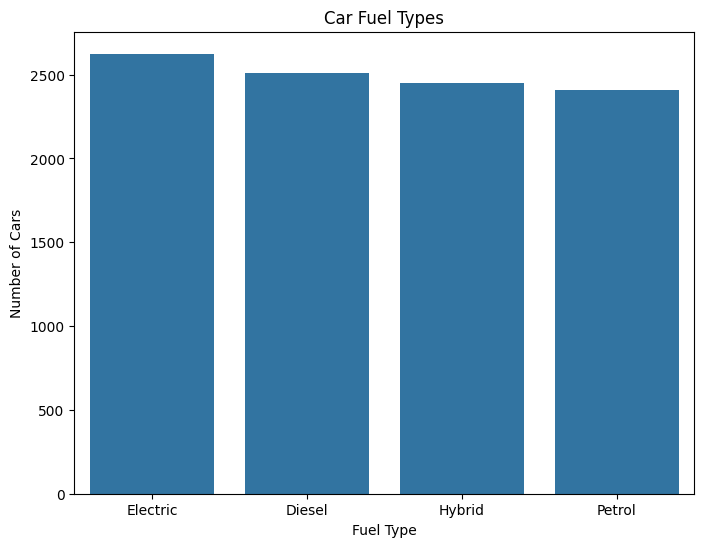

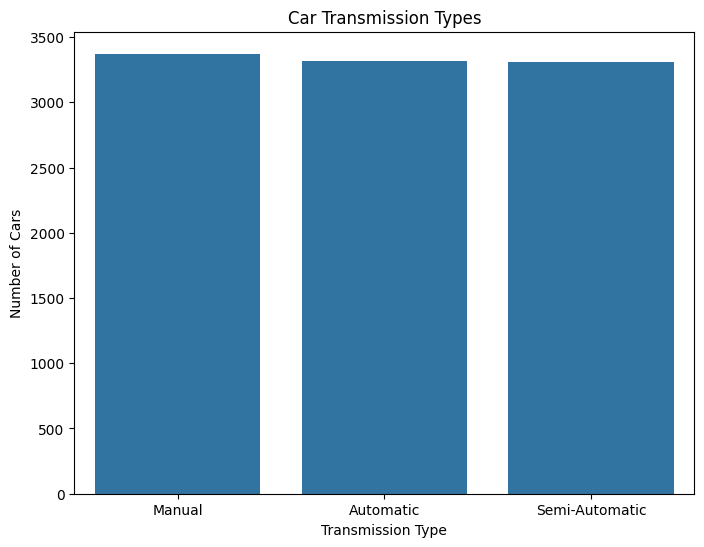

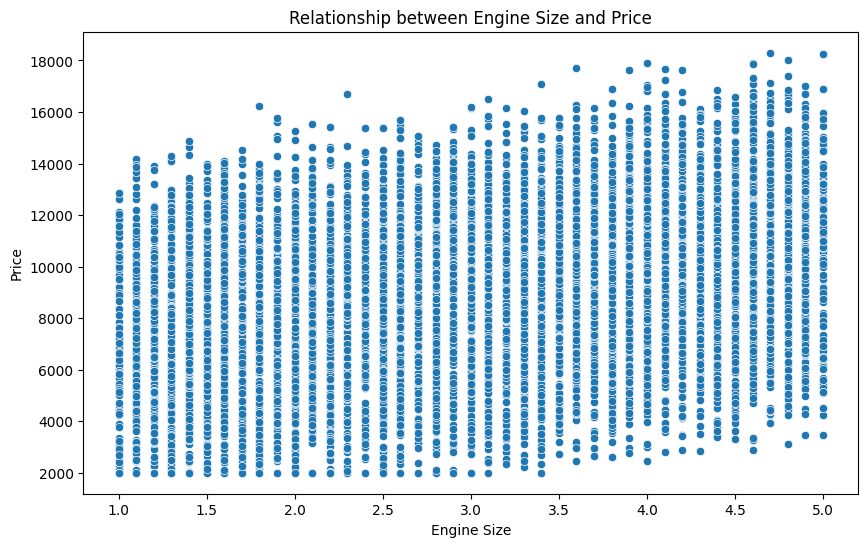

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io  # Add this import

# Data Cleaning and type conversion (No date conversion needed, but converting Year to int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# 1. Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()

# 2. Car price vs Year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Price', data=df.dropna(subset=['Year','Price']))
plt.title('Car Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# 3. Distribution of Car mileage
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'].dropna(), bins=30, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Number of Cars')
plt.show()

# 4. Car Mileage vs Year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Mileage', data=df.dropna(subset=['Year','Mileage']))
plt.title('Car Mileage vs Year')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()

# 5. Most Frequent Car Brands
brand_counts = df['Brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Most Frequent Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Average Car Price By Brand
avg_price_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.title('Average Car Price By Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# 7. Car Fuel Type Counts
fuel_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.title('Car Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

# 8. Car Transmission Type Counts
transmission_counts = df['Transmission'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values)
plt.title('Car Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()


# 9. Relationship between Engine Size and Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine_Size', y='Price', data=df.dropna(subset=['Engine_Size', 'Price']))
plt.title('Relationship between Engine Size and Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

**Apply TF-IDF**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset (replace 'car_price_dataset.csv' with your actual filename)
df = pd.read_csv('car_price_dataset.csv')

# 1. Combine text columns into a single feature
def combine_text_features(row):
    return f"{row['Brand']} {row['Model']} {row['Fuel_Type']}".lower()

df['text_feature'] = df.apply(combine_text_features, axis=1)

# 2. Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text_feature'])

# 3. Convert to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display TF-IDF matrix
print(tfidf_df.head())

    a3   a4  accord      audi  bmw  camry  chevrolet  civic  class  corolla  \
0  0.0  0.0     0.0  0.000000  0.0    0.0   0.000000    0.0    0.0      0.0   
1  0.0  0.0     0.0  0.000000  0.0    0.0   0.549637    0.0    0.0      0.0   
2  0.0  0.0     0.0  0.000000  0.0    0.0   0.000000    0.0    0.0      0.0   
3  0.0  0.0     0.0  0.551485  0.0    0.0   0.000000    0.0    0.0      0.0   
4  0.0  0.0     0.0  0.000000  0.0    0.0   0.000000    0.0    0.0      0.0   

   ...  rav4       rio  series  sonata  sportage  tiguan  toyota  tucson  \
0  ...   0.0  0.733737     0.0     0.0       0.0     0.0     0.0     0.0   
1  ...   0.0  0.000000     0.0     0.0       0.0     0.0     0.0     0.0   
2  ...   0.0  0.000000     0.0     0.0       0.0     0.0     0.0     0.0   
3  ...   0.0  0.000000     0.0     0.0       0.0     0.0     0.0     0.0   
4  ...   0.0  0.000000     0.0     0.0       0.0     0.0     0.0     0.0   

   volkswagen   x5  
0    0.000000  0.0  
1    0.000000  0.0  
2    

**Apply Recursive Feature Elimination (RFE)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your dataset (replace 'car_price_dataset.csv' with your actual filename)
df = pd.read_csv('car_price_dataset.csv')

# 1. Combine text columns into a single feature
def combine_text_features(row):
    return f"{row['Brand']} {row['Model']} {row['Fuel_Type']}".lower()

df['text_feature'] = df.apply(combine_text_features, axis=1)

# 2. Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text_feature'])

# 3. Convert to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# 4. Define the target variable (expensive or not) based on a price threshold.
# We will choose a price threshold of the median to make the target variable balaced.
price_threshold = df['Price'].median()
df['Expensive'] = df['Price'].apply(lambda x: 1 if x >= price_threshold else 0)


# 5.  Use TF-IDF features as input (X) and 'Expensive' as the target (y)
X = tfidf_matrix
y = df['Expensive']

# 6. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Initialize the estimator (Logistic Regression)
estimator = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# 8. Initialize RFE
rfe = RFE(estimator, n_features_to_select=100)  # Select top 100 features

# 9. Fit RFE
rfe.fit(X_train, y_train)


# 10. Get selected features (as indices to column names)
selected_features = rfe.support_
selected_feature_names = np.array(tfidf_df.columns)[selected_features]

# 11. Filter TF-IDF matrix to keep only selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# 12. Display the shape of the reduced feature matrices
print(f"Shape of reduced training feature matrix: {X_train_selected.shape}")
print(f"Shape of reduced test feature matrix: {X_test_selected.shape}")
# Display the selected features:
print("Selected features are:\n",selected_feature_names)

Shape of reduced training feature matrix: (8000, 42)
Shape of reduced test feature matrix: (2000, 42)
Selected features are:
 ['a3' 'a4' 'accord' 'audi' 'bmw' 'camry' 'chevrolet' 'civic' 'class'
 'corolla' 'cr' 'diesel' 'elantra' 'electric' 'equinox' 'explorer'
 'fiesta' 'focus' 'ford' 'gla' 'golf' 'honda' 'hybrid' 'hyundai' 'impala'
 'kia' 'malibu' 'mercedes' 'optima' 'passat' 'petrol' 'q5' 'rav4' 'rio'
 'series' 'sonata' 'sportage' 'tiguan' 'toyota' 'tucson' 'volkswagen' 'x5']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=100 > n_features=42. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
# Get the names of the selected features
selected_feature_names = tfidf.get_feature_names_out()[selected_features]

# Display the selected features
print("Selected Features (Words):")
print(selected_feature_names)

# Check the ranking of features
feature_ranking = rfe.ranking_

# Display the ranking of features
print("Feature Ranking:")
print(feature_ranking)


Selected Features (Words):
['a3' 'a4' 'accord' 'audi' 'bmw' 'camry' 'chevrolet' 'civic' 'class'
 'corolla' 'cr' 'diesel' 'elantra' 'electric' 'equinox' 'explorer'
 'fiesta' 'focus' 'ford' 'gla' 'golf' 'honda' 'hybrid' 'hyundai' 'impala'
 'kia' 'malibu' 'mercedes' 'optima' 'passat' 'petrol' 'q5' 'rav4' 'rio'
 'series' 'sonata' 'sportage' 'tiguan' 'toyota' 'tucson' 'volkswagen' 'x5']
Feature Ranking:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


**Use the SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)  # Use linear kernel for simplicity

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.58


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_clf = XGBClassifier(random_state=42)

# Train and evaluate the model
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")


XGBoost Accuracy: 0.58


In [ ]:
import pickle

# Save preprocessed data and models
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump({
        'df': df,
        'tfidf': tfidf,
        'selected_feature_names': selected_feature_names,  # Use selected_feature_names
        'rfe': rfe,
        'X_train_selected': X_train_selected,  # Save the selected train set
        'X_test_selected': X_test_selected, # Save the selected test set
        'y_train': y_train,
        'y_test':y_test
    }, f)


print("Preprocessed data and models saved to 'preprocessed_data.pkl'.")


Preprocessed data and models saved to 'preprocessed_data.pkl'.


In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load preprocessed data and models
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

df = data['df']
tfidf = data['tfidf']
selected_feature_names = data['selected_feature_names']
rfe = data['rfe']
X_train_selected = data['X_train_selected']
X_test_selected = data['X_test_selected']
y_train = data['y_train']
y_test = data['y_test']

# Display the loaded data
print("First 5 rows of the dataframe:\n",df.head())
print(f"Shape of reduced training feature matrix: {X_train_selected.shape}")
print(f"Shape of reduced testing feature matrix: {X_test_selected.shape}")
print("Selected features are:\n",selected_feature_names)

First 5 rows of the dataframe:
         Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price             text_feature  Expensive  
0      3            5   8501           kia rio diesel          0  
1      2            3  12092  chevrolet malibu hybrid          1  
2      4            2  11171      mercedes gla diesel          1  
3      2            1  11780         audi q5 electric          1  
4      3            3   2867   volkswagen golf hybrid          0  
Shape of reduced training feature matrix: (8000, 42)
Shape of reduced testing feature matri